In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
import matplotlib.image as pltimg

In [2]:
df = pd.read_csv('madfhantr.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
#check for missing values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [4]:
#we can drop the massing values
df.dropna(inplace=True)
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
#Decision tree does not support categorical data as features.
# I selected few of the columns from the dataset for this tutorial
df = df[['Gender','Married','Education','Self_Employed','Credit_History','Loan_Status']]

df['Gender']=df['Gender'].replace(to_replace='Male',value='1')
df['Gender']=df['Gender'].replace(to_replace='Female',value='0')


df['Married']=df['Married'].replace(to_replace='Yes',value='1')
df['Married']=df['Married'].replace(to_replace='No',value='0')


df['Self_Employed']=df['Self_Employed'].replace(to_replace='No',value='0')
df['Self_Employed']=df['Self_Employed'].replace(to_replace='Yes',value='1')


df['Education']=df['Education'].replace(to_replace='Graduate',value='1')
df['Education']=df['Education'].replace(to_replace='Not Graduate',value='0')


c:\users\kabilan n\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
c:\users\kabilan n\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\kabilan n\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

In [6]:
df

,Gender,Married,Education,Self_Employed,Credit_History,Loan_Status
1,1,1,1,0,1.0,N
2,1,1,1,1,1.0,Y
3,1,1,0,0,1.0,Y
4,1,0,1,0,1.0,Y
5,1,1,1,1,1.0,Y
...,...,...,...,...,...,...
609,0,0,1,0,1.0,Y
610,1,1,1,0,1.0,Y
611,1,1,1,0,1.0,Y
612,1,1,1,0,1.0,Y


In [7]:
X = df.drop(columns=['Loan_Status'])
Y = df.Loan_Status

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=4)

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth=3)
clf.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [10]:
clf.score(X_test,Y_test)

0.7777777777777778

In [11]:
features = ['Gender','Married','Education','Self_Employed','Credit_History']
text_representation = tree.export_text(clf,feature_names=features)
print(text_representation)

|--- Credit_History <= 0.50
|   |--- Gender <= 0.50
|   |   |--- class: N
|   |--- Gender >  0.50
|   |   |--- Self_Employed <= 0.50
|   |   |   |--- class: N
|   |   |--- Self_Employed >  0.50
|   |   |   |--- class: N
|--- Credit_History >  0.50
|   |--- Married <= 0.50
|   |   |--- Education <= 0.50
|   |   |   |--- class: Y
|   |   |--- Education >  0.50
|   |   |   |--- class: Y
|   |--- Married >  0.50
|   |   |--- Education <= 0.50
|   |   |   |--- class: Y
|   |   |--- Education >  0.50
|   |   |   |--- class: Y



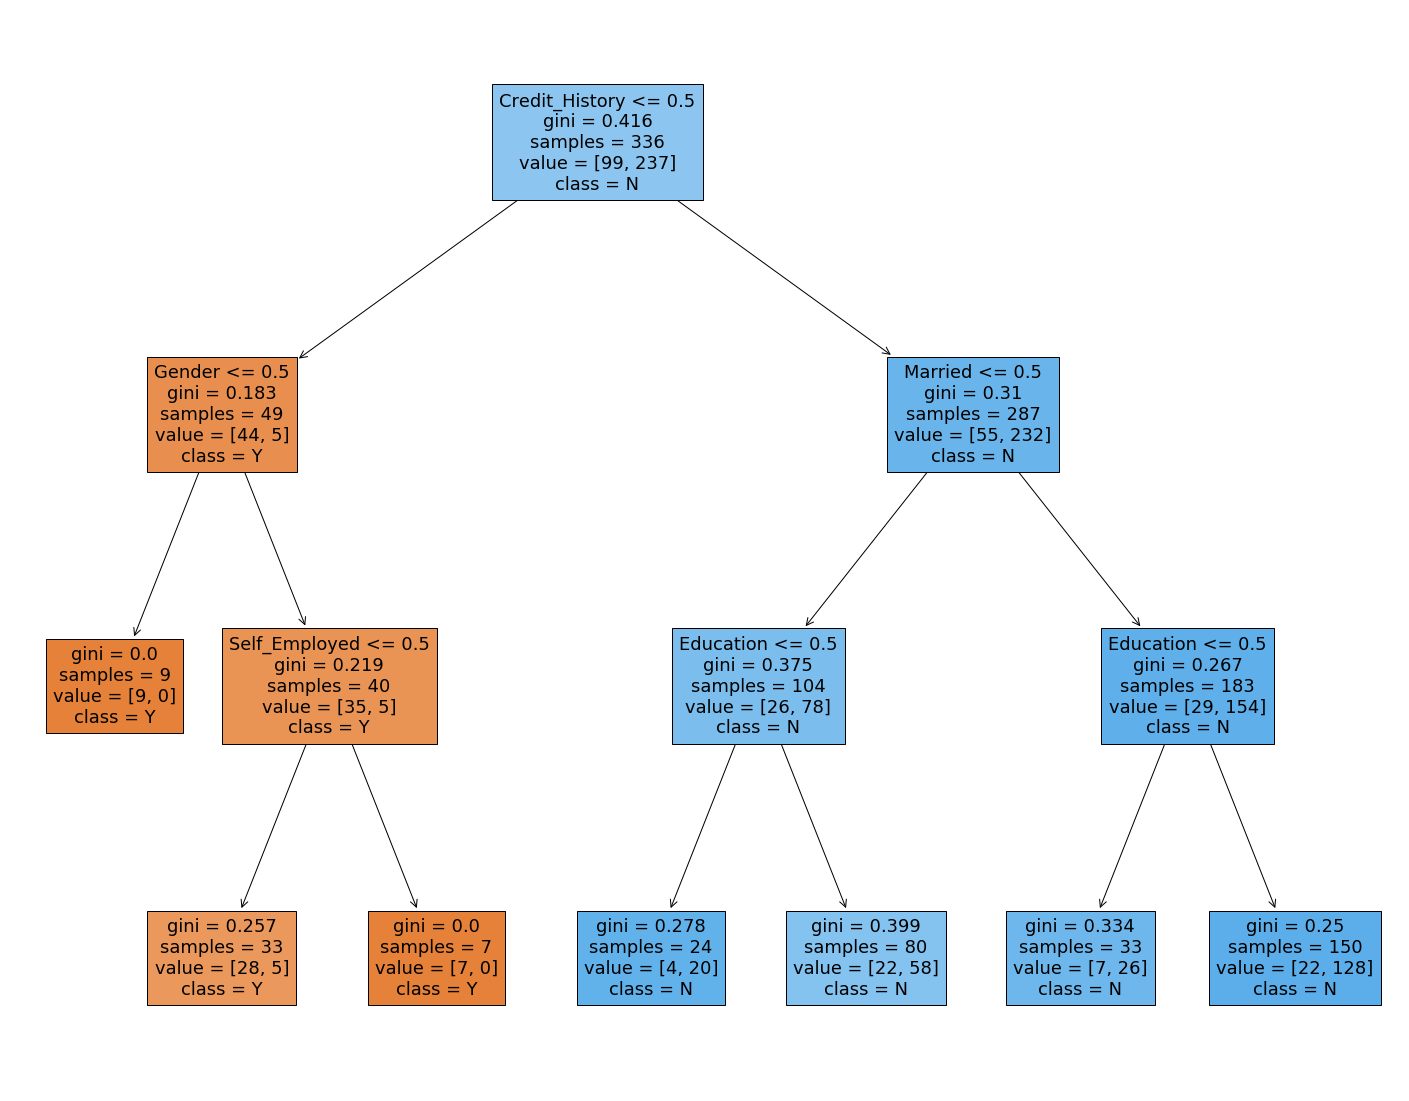

In [12]:
cl_names = ["Y","N"]
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=features,
                   class_names=cl_names,
                   filled=True)